- Mount Google Drive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

- Navigate to directory

In [2]:
# import os
# os.chdir('/content/drive/My Drive/Mortality-Prediction-MLP')

# Data preparation and processing

- Import libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import numpy as np
import pandas as pd

- Download dataset via kagglehub (Only run once)

In [4]:
# import kagglehub

# path = kagglehub.dataset_download("mitishaagarwal/patient")

# print("Path to dataset files:", path)

- Give a variable to store the path
- Read the CSV from the path
- Display the first 5 rows of data to test if successfully read the path

In [5]:
path = "/Users/soongjun/.cache/kagglehub/datasets/mitishaagarwal/patient/versions/3/dataset.csv"
# path = "/root/.cache/kagglehub/datasets/mitishaagarwal/patient/versions/3/dataset.csv"

data = pd.read_csv(path)

# data.head()

- Count the number of rows and columns
- Display the columns' names

In [6]:
print("Dataset shape:", data.shape, "\n")
print("Columns:", data.columns)

Dataset shape: (91713, 85) 

Columns: Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_t

- Drop empty column by index
- Count the number of rows and columns to ensure the column is removed
- Display the new columns' names

In [7]:
data = data.drop(data.columns[-2], axis=1)
data = data.drop(columns = ["encounter_id", "hospital_id"])

print("Dataset shape:", data.shape, "\n")
print("Columns:", data.columns)

Dataset shape: (91713, 82) 

Columns: Index(['patient_id', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender',
       'height', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type',
       'pre_icu_los_days', 'weight', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache',
       'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache',
       'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache',
       'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache',
       'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min',
       'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min',
       'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max', 'd1_sysbp_min',
       'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_

- Check the total columns with missing values

In [8]:
missing_values = data.isnull().mean() * 100

missing_summary = missing_values[missing_values > 0].sort_values(ascending=False)

print(f"Total columns with missing values: {missing_summary.shape[0]}")

Total columns with missing values: 74


- Set a random seed to ensure the randomness is consistent

In [9]:
np.random.seed(42)

- Separate the columns into numerical and categorical
- Handle missing values in numerical and categorical seperately
- Numerical will fill in missing values with medium values
- Categorical will fill in missing values with random choice from non-missing values
- Check if missing values is remained exist 

In [10]:
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(exclude=['number']).columns

for col in numerical_columns:
    if data[col].isnull().sum() > 0:
        data[col] = data[col].fillna(data[col].median())

for col in categorical_columns:
    if data[col].isnull().sum() > 0:
        non_missing_values = data[col].dropna().unique()
        
        data[col] = data[col].apply(
            lambda x: np.random.choice(non_missing_values) if pd.isnull(x) else x
        )

missing_values_after_imputation = data.isnull().sum().sum()
print(f"Total missing values after imputation: {missing_values_after_imputation}")

Total missing values after imputation: 0


- Check the data types to identify categorical columns
- Apply one-hot Encoding to to categorical columns
- Count the number of rows and columns in the data

In [11]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print("Categorical Columns:", categorical_columns, "\n")
# print("Data after one-hot encoding:", "\n")
# print(df_encoded.head(), "\n")
print("Shape after encoding:", data.shape, "\n")

Categorical Columns: ['ethnicity', 'gender', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem'] 

Shape after encoding: (91713, 113) 



- Identify the numerical columns
- Remove the target variables
- Normalise or scale numerial features with one-hot encoder

In [12]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

numerical_columns.remove('hospital_death')

scaler = StandardScaler()

data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# print("Data after scaling:", "\n")
# print(data.head(), "\n")
print("Shape after scaling:", data.shape, "\n")

Shape after scaling: (91713, 113) 



- Separate the encoded data into X and y
- Split the data into training, validation, and testing set
- Data spliting ratio is 80:10:10
- Apply feature scaling after splitting

In [13]:
X = data.drop(columns=['hospital_death', 'patient_id'])
y = data['hospital_death']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

X_train = scaler.fit_transform(X_train)

X_validate = scaler.transform(X_validate)

X_test = scaler.transform(X_test)

print("Training set shape:", X_train.shape, "\n")
print("Validation set shape:", X_validate.shape, "\n")
print("Test set shape:", X_test.shape, "\n")

Training set shape: (73370, 111) 

Validation set shape: (9171, 111) 

Test set shape: (9172, 111) 



# Model Architecture

- Import external Python file which is the model architecture
- Import libraries 

In [14]:
from early_stopping import EarlyStopping
from hyperparameter_utils import sample_hyperparameters, train_and_evaluate
from model_utils import MLPModel
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score
from torch.utils.data import DataLoader, TensorDataset

import matplotlib.pyplot as plt
import random
import seaborn as sns
import torch
import torch.nn as nn

- Check if CUDA is available and set the device
- Set initial hyperparameters
- Call the model from external Python file
- Display the architecture of the model
- Apply Binary Cross Entropy Loss
- Apply Adam

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}", "\n")

input_dim = X_train.shape[1]
hidden_layers = [128, 64]
dropout_rate = 0.3
learning_rate = 0.001
batch_size = 32
num_epochs = 50

model = MLPModel(input_dim=input_dim, hidden_layers=hidden_layers, dropout_rate=dropout_rate).to(device)

print(model)

criterion = nn.BCELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Using device: cpu 

MLPModel(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=111, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
  )
  (batch_norms): ModuleList(
    (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)


- Convert data into numpy array

In [16]:
y_validate = y_validate.to_numpy()

- Convert data into Tensor array
- Assign variables for train and validate dataset
- Feed the data into DataLoader

In [17]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_validate_tensor = torch.tensor(X_validate, dtype=torch.float32)
y_validate_tensor = torch.tensor(y_validate, dtype=torch.float32).unsqueeze(1)

X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_validate_tensor = X_validate_tensor.to(device)
y_validate_tensor = y_validate_tensor.to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
validate_dataset = TensorDataset(X_validate_tensor, y_validate_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validate_loader = DataLoader(validate_dataset, batch_size=batch_size)

- Train the model
- Validate the model
- Display the best validate loss
- Apply early stopping

In [18]:
best_validate_loss = float('inf')

train_losses = []
validate_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        predictions = model(X_batch)
        loss = criterion(predictions, y_batch)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    validate_loss = 0.0
    
    with torch.no_grad():
        for X_batch, y_batch in validate_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)
            validate_loss += loss.item()

    validate_loss /= len(validate_loader)
    validate_losses.append(validate_loss)

    if validate_loss < best_validate_loss:
        best_validate_loss = validate_loss
        torch.save(model.state_dict(), 'MLP_model.pth')


    if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validate Loss: {validate_loss:.4f}")

print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Validate Loss: {validate_loss:.4f}")

Epoch 10/50, Train Loss: 0.1942, Validate Loss: 0.1962
Epoch 20/50, Train Loss: 0.1864, Validate Loss: 0.1980
Epoch 30/50, Train Loss: 0.1804, Validate Loss: 0.2023
Epoch 40/50, Train Loss: 0.1762, Validate Loss: 0.2041
Epoch 50/50, Train Loss: 0.1736, Validate Loss: 0.2039
Epoch 50/50, Train Loss: 0.1736, Validate Loss: 0.2039


- Visualise the training and validating loss over epochs

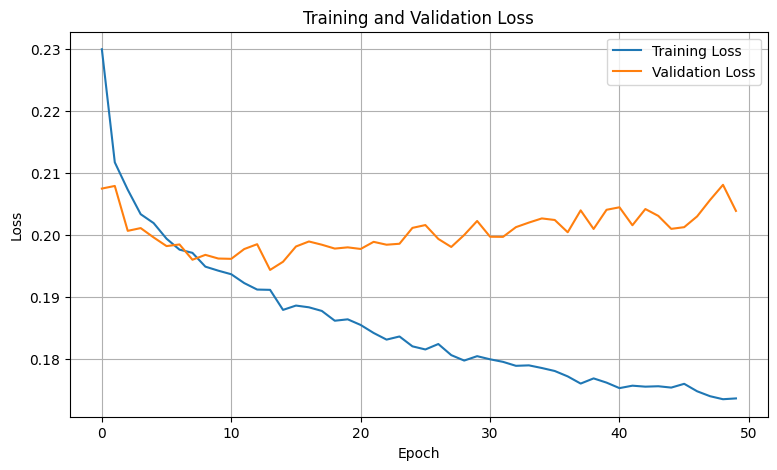

In [19]:
plt.figure(figsize=(9, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(validate_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

- Initiate CUDA if available
- List of hyperparameter prepared to tune
- Set up number of trials to search the best hyperparameter

In [20]:
param_space = {
    'hidden_layers': [[128, 64], [256, 128], [64, 32]],
    'dropout_rate': [0.2, 0.3, 0.5],
    'learning_rate': [0.001, 0.01],
    'batch_size': [32, 64]
}

num_trials = 10
results = []

for _ in range(num_trials):
    params = sample_hyperparameters(param_space)
    validate_loss, params = train_and_evaluate(
        params=params,
        model_class=MLPModel,
        input_dim=X_train.shape[1],
        train_dataset=train_dataset,
        validate_dataset=validate_dataset,
        criterion=criterion,
        num_epochs=100
    )
    results.append((validate_loss, params))

results = sorted(results, key=lambda x: x[0])
print("Best Configuration:", results[0])

Testing configuration: {'hidden_layers': [256, 128], 'dropout_rate': 0.2, 'learning_rate': 0.01, 'batch_size': 32}
Early stopping triggered at epoch 37
Best Validation Loss for configuration {'hidden_layers': [256, 128], 'dropout_rate': 0.2, 'learning_rate': 0.01, 'batch_size': 32}: 0.1968

Testing configuration: {'hidden_layers': [128, 64], 'dropout_rate': 0.3, 'learning_rate': 0.01, 'batch_size': 32}
Early stopping triggered at epoch 41
Best Validation Loss for configuration {'hidden_layers': [128, 64], 'dropout_rate': 0.3, 'learning_rate': 0.01, 'batch_size': 32}: 0.1960

Testing configuration: {'hidden_layers': [128, 64], 'dropout_rate': 0.3, 'learning_rate': 0.01, 'batch_size': 64}
Early stopping triggered at epoch 43
Best Validation Loss for configuration {'hidden_layers': [128, 64], 'dropout_rate': 0.3, 'learning_rate': 0.01, 'batch_size': 64}: 0.1965

Testing configuration: {'hidden_layers': [128, 64], 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32}
Early stoppin

- Combine the training data and validate data into one dataset
- Extract the best hyperparameter tuning list
- Train the model again with the best parameters
- Apply early stopping

In [21]:
best_result = min(results, key=lambda x: x[0])
best_params = best_result[1]

X_train_combined = torch.cat((X_train_tensor, X_validate_tensor), dim=0).to(device)
y_train_combined = torch.cat((y_train_tensor, y_validate_tensor), dim=0).to(device)

combined_dataset = TensorDataset(X_train_combined, y_train_combined)
combined_loader = DataLoader(combined_dataset, batch_size=best_params['batch_size'], shuffle=True)

model = MLPModel(
    input_dim=X_train_combined.shape[1],
    hidden_layers=best_params['hidden_layers'],
    dropout_rate=best_params['dropout_rate']
).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=best_params['learning_rate'])

early_stopping = EarlyStopping(patience=40, min_delta=0.0005)

train_losses = []
val_losses = []

num_epochs = 400
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in combined_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        
        predictions = model(X_batch)
        loss = criterion(predictions, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(combined_loader)
    train_losses.append(train_loss)
    
    if (epoch + 1) % 10 == 0 or epoch == num_epochs - 1:
        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}")

    early_stopping.check(train_loss)
    if early_stopping.should_stop:
        print(f"Early stopping triggered at epoch {epoch + 1}")
        break

Epoch 10/400, Train Loss: 0.2085
Epoch 20/400, Train Loss: 0.2048
Epoch 30/400, Train Loss: 0.2024
Epoch 40/400, Train Loss: 0.2006
Epoch 50/400, Train Loss: 0.1986
Epoch 60/400, Train Loss: 0.1971
Epoch 70/400, Train Loss: 0.1951
Epoch 80/400, Train Loss: 0.1950
Epoch 90/400, Train Loss: 0.1933
Epoch 100/400, Train Loss: 0.1938
Epoch 110/400, Train Loss: 0.1914
Epoch 120/400, Train Loss: 0.1915
Epoch 130/400, Train Loss: 0.1928
Epoch 140/400, Train Loss: 0.1900
Epoch 150/400, Train Loss: 0.1922
Epoch 160/400, Train Loss: 0.1902
Epoch 170/400, Train Loss: 0.1910
Epoch 180/400, Train Loss: 0.1891
Epoch 190/400, Train Loss: 0.1908
Early stopping triggered at epoch 199


- Visualise the training loss over epochs

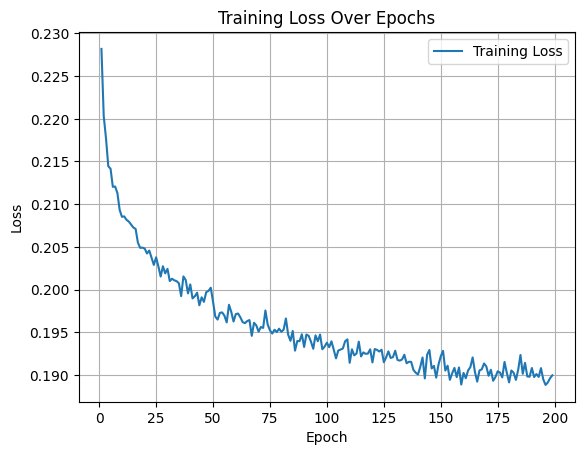

In [22]:
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

- Save the model's parameters instead of the whole model

In [23]:
torch.save(model.state_dict(), 'MLP_model.pth')
print("Model saved successfully.")

Model saved successfully.


- Convert data into Tensor format
- Load the model for testing phase
- Use the saved model to evaluate the testing dataset

In [24]:
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

model = MLPModel(
    input_dim=X_train_combined.shape[1],
    hidden_layers=best_params['hidden_layers'],
    dropout_rate=best_params['dropout_rate']
).to(device)

model.load_state_dict(torch.load('MLP_model.pth'))
model.eval()

with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_loss = criterion(test_predictions, y_test_tensor).item()

    test_predictions = (test_predictions > 0.5).float()

# print(f"Test Loss: {test_loss:.4f}", "\n")

/var/folders/dw/gqdjz0756k11zwysr92bpkvc0000gn/T/ipykernel_11975/1158255887.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('MLP_model.

- Include metrics tracking and accuracy to assess the model's performance

In [25]:
correct_predictions = (test_predictions == y_test_tensor).sum().item()
total_predictions = y_test_tensor.size(0)
accuracy = (correct_predictions / total_predictions) * 100

print(f"Test Loss: {test_loss:.4f}", "\n")
print(f"Accuracy: {accuracy:.2f}%", "\n")

y_test_np = y_test_tensor.numpy()
y_pred_np = test_predictions.numpy()
# y_test_np = y_test_tensor.cpu().numpy()
# y_pred_np = test_predictions.cpu().numpy()

print("Classification Report:")
print(classification_report(y_test_np, y_pred_np), "\n")

# print("Confusion Matrix:")
# print(confusion_matrix(y_test_np, y_pred_np))

Test Loss: 0.1924 

Accuracy: 93.11% 

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      8380
         1.0       0.80      0.27      0.40       792

    accuracy                           0.93      9172
   macro avg       0.87      0.63      0.68      9172
weighted avg       0.92      0.93      0.92      9172
 



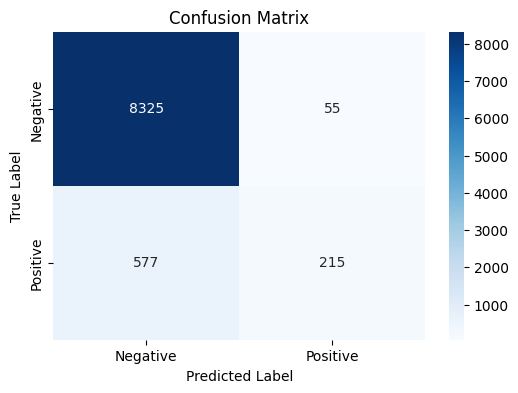

In [26]:
conf_matrix = confusion_matrix(y_test_tensor.numpy(), test_predictions.numpy())

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

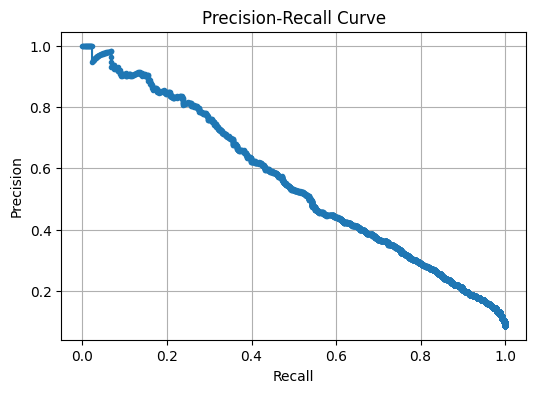

In [27]:
y_test_np = y_test_tensor.numpy()
test_probabilities = model(X_test_tensor).detach().numpy()
precision, recall, thresholds = precision_recall_curve(y_test_np, test_probabilities)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

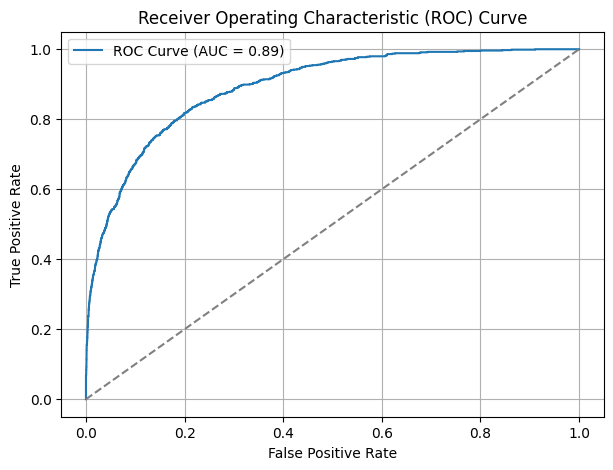

In [28]:
fpr, tpr, roc_thresholds = roc_curve(y_test_np, test_probabilities)
roc_auc = roc_auc_score(y_test_np, test_probabilities)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()